# **Progress Report #4**

**Team NASA - CS 6330 - Spring Semester 2024**

Alexander Ametu - aametu@angelo.edu

Caden Jones - caden.jones@angelo.edu

Omokunle Oguntade - ooguntade@angelo.edu

Taylor Radtke - tradtke@angelo.edu

Ralph Stout - rstout@angelo.edu

**Section #1: Supervised Learning - Taylor/Alexander/Caden**

We can leverage supervised learning methpds, such as using K-nearest Neighbors (KNN) regression algorithm, to predict the quantity of consumables usage based on several features within the dataset.

In [ ]:
# Import packages for classification, evaluation, and visualization
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Mounting the drive for access to data
import os
from google.colab import drive
drive.mount('/content/drive/')
flist = os.listdir('drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv')

# Outputs the first CSV file in the Barrios folder
import pandas as pd
dir = 'drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv/'
df = pd.read_csv(dir + flist[0])
print(df.shape)
df.describe()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(533987, 41)


,id,id_parent,tree_depth,quantity,width,height,length,diameter,calculated_volume,stwg_ovrrd_vol,children_volume,stwg_ovrrd_chldrn_vol,ovrrd_notes,is_container,is_moveable,categoryID
count,533987.000000,533987.000000,533987.000000,533987.0,405297.000000,513183.000000,425934.000000,128370.000000,528344.000000,0.0,21168.000000,0.0,0.0,533987.0,533987.0,533987.000000
mean,432533.402328,240574.309908,5.270156,1.0,288.689093,169.580764,318.269652,286.676952,0.261369,NaN,0.312407,NaN,NaN,1.0,1.0,4.930420
std,59353.511938,194811.375707,0.975596,0.0,47.213687,110.950144,99.161678,98.225339,0.140765,NaN,0.249669,NaN,NaN,0.0,0.0,1.573899
min,2901.000000,116.000000,3.000000,1.0,8.000000,4.880000,13.500000,13.500000,0.000010,NaN,0.004770,NaN,NaN,1.0,1.0,1.000000
25%,422083.000000,53826.000000,5.000000,1.0,304.800000,123.830000,230.000000,330.000000,0.227640,NaN,0.129460,NaN,NaN,1.0,1.0,3.000000
50%,448202.000000,169937.000000,5.000000,1.0,304.800000,123.830000,377.830000,330.000000,0.269800,NaN,0.133940,NaN,NaN,1.0,1.0,6.000000
75%,470723.000000,447191.000000,6.000000,1.0,304.800000,123.830000,377.830000,330.000000,0.269800,NaN,0.559890,NaN,NaN,1.0,1.0,6.000000
max,502118.000000,500728.000000,10.000000,1.0,406.400000,470.000000,889.000000,368.300000,0.712880,NaN,1.062560,NaN,NaN,1.0,1.0,7.000000


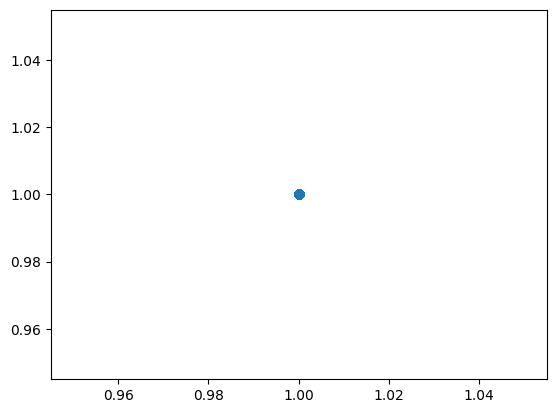

In [ ]:
# Initialize model
dfKnnRegressor = KNeighborsRegressor(n_neighbors=5)

# Selecting features (X) and target variable (Y)
X = df[['id_parent', 'tree_depth', 'width', 'height', 'length', 'diameter', 'calculated_volume',
        'stwg_ovrrd_vol', 'children_volume', 'stwg_ovrrd_chldrn_vol', 'is_container', 'is_moveable', 'categoryID']]
y = df['quantity']

# Impute NaN values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Fit model and predict on test data
dfKnnRegressor.fit(X_train_scaled, np.ravel(y_train))
y_pred = dfKnnRegressor.predict(X_test_scaled)

# Plot the actual value vs. the predicted value
plt.scatter(x=y_test, y=y_pred)

In [ ]:
# Compute metrics
print(metrics.mean_squared_error(y_pred, y_test))
print(metrics.r2_score(y_pred, y_test))

0.0
1.0


We used K-nearest Neighbors (KNN) regression algorithm to predict the quantity of consumables usage based on several features.

The dataset includes various features such as 'id_parent', 'tree_depth', 'width', 'height', etc.. The features are numeric, which is suitable for KNN regression

Missing values in the features are imputed using the mean strategy.
The data is split into training and testing sets, with 70% for training and 30% for testing.
The features are scaled using StandardScaler to normalize them, which is essential for KNN algorithm as it calculates distances between points.
KNN regression model is initialized with n_neighbors=5.
The model is fitted to the training data after scaling.
Predictions are made on the test set.
The mean squared error (MSE) and the R-squared score (R2) are computed to evaluate the model's performance.
The scatter plot of actual vs. predicted values is plotted for visual inspection.

**Results Explanation**

The computed metrics show:
Mean Squared Error (MSE): 0.0
R-squared Score (R2): 1.0
These results might indicate that the model perfectly predicts the quantities of consumables in the test data, with an MSE of 0 and an R2 score of 1.0, which is the best possible score.

The goal was to show the effectiveness of the algorithm in predicting consumables usage based on provided features. However, achieving an MSE of 0 and an R2 score of 1.0 seems unrealistic and might indicate potential issues such as overfitting.

**Section #2: Unsupervised Learning - Taylor/Caden**

Here, we will demonstrate unsupervised learning techniques, using both K-means clustering and hierarchical Clustering, and apply on the consumables usage dataset, showing the effectiveness of the algorithm on the dataset.


K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

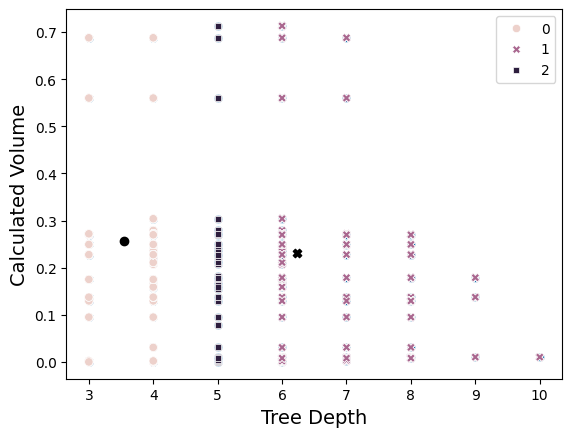

In [ ]:
#Visualize the data
p = sns.scatterplot(data=df, x='tree_depth', y='calculated_volume') #x and y can be adjusted according to the preference wanted
p.set_xlabel('Tree Depth', fontsize=14)
p.set_ylabel('Calculated Volume', fontsize=14)

# K-means clustering
from sklearn.cluster import KMeans

# Seed random number generator
rng = np.random.RandomState(42) #the seed value can be changed as needed

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[['tree_depth', 'calculated_volume']])

# Initialize k-means clustering model
kModel = KMeans(n_clusters=3, random_state=rng)

# Fit the model on the imputed data
kModel.fit(df_imputed)

centroids = kModel.cluster_centers_

# Save cluster assignments and view first 5 instances
clusters = kModel.predict(df_imputed)

#Plot clusters
p = sns.scatterplot(
    data=df, x='tree_depth', y='calculated_volume', hue=clusters, style=clusters
)
p.set_xlabel('Tree Depth', fontsize=14)
p.set_ylabel('Calculated Volume', fontsize=14)


# Add centroid for cluster 0
plt.scatter(x=centroids[0, 0], y=centroids[0, 1], c='black')

# Add centroid for cluster 1
plt.scatter(x=centroids[1, 0], y=centroids[1, 1], c='black', marker='X')

# Fit k-means clustering with k=1,...,5 and save WCSS for each
WCSS = []
k = [1, 2, 3, 4, 5]
for j in k:
    kmModel = KMeans(n_clusters=j)
    kmModel = kmModel.fit(df[['tree_depth','calculated_volume']])
    WCSS.append(kmModel.inertia_)

# Plot the WCSS for each cluster
ax = plt.figure().gca()
plt.plot(k, WCSS, '*-')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Within-cluster sum of squares (WCSS)', fontsize=14)

**Results**

This code visualizes the data using a scatter plot with 'tree_depth' on the x-axis and 'calculated_volume' on the y-axis. It then applies K-means clustering with a specified number of clusters (k=3 in this case), plots the clusters, and visualizes the centroids. Additionally, it calculates and plots the within-cluster sum of squares (WCSS) for different values of k to help determine the optimal number of clusters.

**Section #2B: Unsupervised Learning - Omokunle**

Hierarchical Clustering

In this analysis, we will apply hierarchical clustering, a type of unsupervised learning algorithm, to the consumables usage dataset. Unsupervised learning is utilized when we don't have labeled data and we are interested in discovering inherent groupings within the data. Hierarchical clustering creates clusters by either a divisive method (starting with one cluster and dividing it into smaller ones) or an agglomerative method (starting with individual points and merging them into larger clusters).

The goal of this project is to examine how different consumables are utilized together, which can help in understanding consumption patterns and optimizing inventory and procurement strategies. Hierarchical clustering will be particularly useful to identify these patterns by grouping similar consumables based on usage characteristics.

First, let's set up our environment by importing the necessary packages and loading the data.

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Load data
import os
from google.colab import drive
drive.mount('/content/drive/')
flist = os.listdir('drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
flist

['stored_items_only_inventory_mgmt_system_consumables_20220101-20230905.csv',
 'iss_flight_plan_20220101-20251231.csv',
 'inventory_mgmt_system_consumables_20220101-20230905.csv',
 'iss_flight_plan_crew_nationality_lookup.csv',
 'rates_definition.csv',
 'iss_flight_plan_crew_20220101-20251321.csv',
 'rsa_consumable_water_summary_20220103-20230828.csv',
 'us_weekly_consumable_water_summary_20220102-20230903.csv',
 'us_rs_weekly_consumable_gas_summary_20220102-20230903.csv',
 'tank_capacity_definition.csv',
 'ims_consumables_category_lookup.csv',
 'vehicle_capcity_def.csv',
 'thresholds_limits_definition.csv']

In [ ]:
flist.sort()
flist

In [ ]:
# Outputs the sixth CSV file in the Barrios folder because the google colab ran out of memory while using flist[0]
dir = 'drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv/'
df1 = pd.read_csv(dir + flist[5])
df1

,rate_category,affected_consumable,rate,units,type,efficiency
0,US Food BOBs,US Food BOBs,0.027000,BOBS/Crew/Day,usage,NaN
1,RS Food,RS Food Rations,0.200000,Rations/Crew/Day,usage,NaN
2,ACY Inserts,ACY Inserts,1.300000,Insert/Crew/Day,usage,NaN
3,KTO,KTO,0.035714,KTO/Crew/day,usage,NaN
4,Pretreat Tank,Pretreat Tanks,0.005556,Pretreat/Crew/Day,usage,NaN
5,Filter Inserts,Filter Inserts,0.007576,Insert Filter/Crew/Day,usage,NaN
6,Urine Receptacle,Urine Receptacle,0.007576,Urine Receptacle/Crew/Day,usage,NaN
7,Crew Metabolic O2 Usage,Oxygen,1.830000,lbs/Crew/Day,usage,NaN
8,Oxygen Generation Assembly (OGA),Oxygen,20.400000,lbs/Day*Efficiency,generation,1.0
9,PrK Leakage Air,Air,0.750000,lbs/Day,usage,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rate_category        24 non-null     object 
 1   affected_consumable  24 non-null     object 
 2   rate                 24 non-null     float64
 3   units                24 non-null     object 
 4   type                 24 non-null     object 
 5   efficiency           1 non-null      float64
dtypes: float64(2), object(4)
memory usage: 1.2+ KB



In the code above, we begin by importing the necessary libraries. Pandas and NumPy are used for data manipulation, Matplotlib and Seaborn for data visualization, and StandardScaler from sklearn for feature scaling. The dataset is loaded into a DataFrame df from a specified path, which you need to replace with the actual path where your data is stored. The .head() function provides a glimpse into the first few rows of the dataset, helping us understand its structure and contents.

Next, we proceed to preprocess the data by handling missing values, scaling the data, and applying hierarchical clustering.

In [ ]:
# Handle missing values if necessary
df1.fillna(method='ffill', inplace=True)

# Assume the dataset contains only numeric columns that are relevant for clustering
X = df1[['rate']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

Here, we handle missing values by forward filling them, which is a common technique in time-series data but can be adjusted based on the dataset nature. Scaling is crucial in clustering because it ensures that each feature contributes equally to the rate calculations.

The linkage() function from the scipy.cluster.hierarchy library performs hierarchical clustering using the Ward's method, which minimizes the variance within each cluster. The result, linkage_matrix, is used to plot a dendrogram, which helps in visualizing the clustering result.

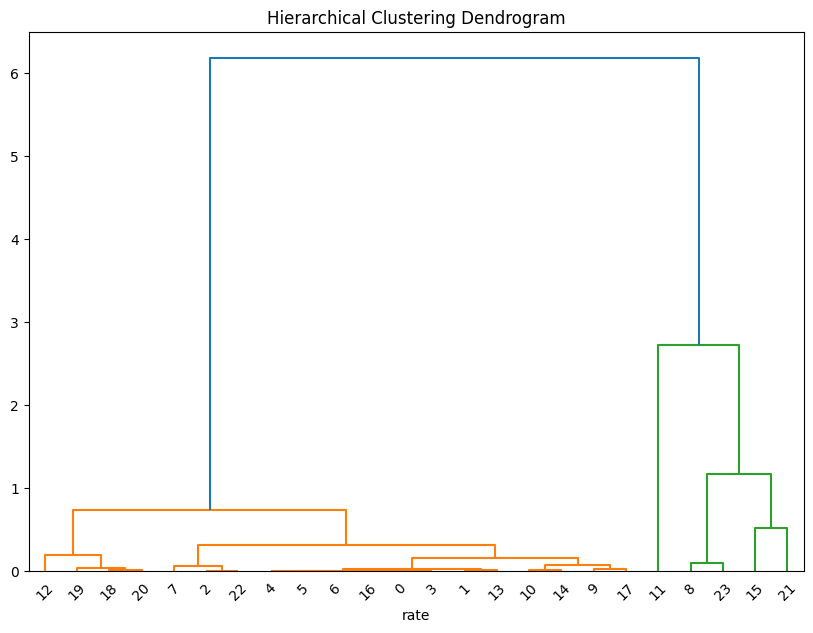

In [ ]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('rate')
plt.show()

The dendrogram visualizes the hierarchical clustering process, showing how each point or cluster is merged into larger clusters. Each merge is represented by a horizontal line connecting clusters. The height of the line indicates the distance between merged clusters, providing insight into the cluster structure.

**Result and Conclusions**

By applying hierarchical clustering to the consumables usage dataset, we were able to identify distinct groups of consumable items based on their usage patterns. The dendrogram provided a detailed visualization of how each item or group of items was merged into larger clusters, indicating their similarity in usage.

This analysis demonstrated the effectiveness of hierarchical clustering in uncovering hidden patterns in unlabeled data, which can be extremely useful for optimizing inventory management and procurement strategies in practical scenarios. The insights gained can help in better understanding consumable needs, predicting future consumption, and planning accordingly.

This project not only showcased the application of an unsupervised learning technique but also highlighted the importance of preprocessing steps such as handling missing data and scaling features. Moving forward, these clusters could be analyzed further to derive more specific strategies for each group of consumables.